In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Contour plot example

We do contour plot of $x_1 \log x_2$, the same example as in the
lecture notes and afterwards plot a few points on it.

In [37]:
def f(x):
    return x[0]*np.log(x[1])
def grad(x):
    return np.array([np.log(x[1]), x[0]/x[1]])

x0 = np.array([1,1])
print(f(x0))
print(grad(x0))

0.0
[0. 1.]


In [35]:
def f(x):
    return -x[0]**2
def grad(x):
    return np.array([-2*x[0]])
## see how it works
x0 = np.array([1])
print(f(x0))
print(grad(x0))
R=0.1
next_step = f(x0) + R*grad(x0)
next_step

-1
[-2]


array([-1.2])

In [4]:
## create 30x30 grid matrix
n = 30
ex1 = np.linspace(0.2, 3, num=n)
ex2 = np.linspace(0.2, 3, num=n)
grid1, grid2 = np.meshgrid(ex1, ex2)
## fill the grid via looping.  You may prefer to use ufuncs instead.
z = np.empty_like(grid1)
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        x = np.array([grid1[i,j], grid2[i,j]])
        z[i,j] = f(x)

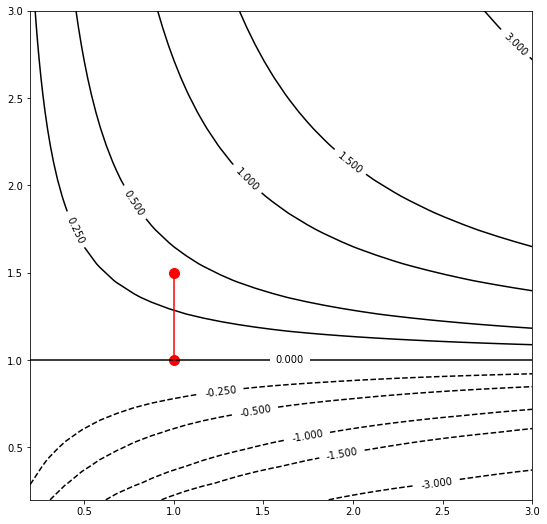

In [6]:
## Make the plot
plt.figure(figsize=(9,9))
p = plt.contour(grid1, grid2, z,
                levels = [-3, -1.5, -1, -0.5, -0.25, 0, 0.25, 0.5, 1, 1.5, 3],
                colors = 'black')
plt.clabel(p, inline=1, fontsize=10)

## Add a few points: x0 = (1,1), x1 = (1, 1.5)
x0 = np.array([1,1])
x1 = np.array([1,1.5])
plt.scatter([x0[0], x1[0]], [x0[1], x1[1]], c='red', s=100)
plt.plot([x0[0], x1[0]], [x0[1], x1[1]], c='red')
plt.show()

In [7]:
np.percentile(np.random.normal(size=100), 50)

0.06796688091929962

In [8]:
def meansamples(m, n):
    mu = np.random.normal(size=(m,n)).mean(axis=1)
    barx = mu.mean()
    std = np.sqrt(mu.var())
    x1 = barx - 1.96*std
    x2 = barx + 1.96*std
    inside = np.logical_and(mu >= x1, mu <= x2).mean()
    return (barx,std,x1, x2, inside)
meansamples(1000,10000)

(-3.56253251756615e-05,
 0.009897601395923473,
 -0.01943492406118567,
 0.019363673410834347,
 0.949)

In [29]:
def meansamples(m, a):
    #mu = np.random.pareto(size=(m,n)).mean(axis=1)
    mu = (np.random.pareto(a, 10) + 1) * m
    barx = mu.mean()
    std = np.sqrt(mu.var())
    x1 = barx - 1.96*std
    x2 = barx + 1.96*std
    inside = np.logical_and(mu >= x1, mu <= x2).mean()
    return (mu,barx,std,x1, x2, inside)
x = meansamples(2,1.9)
x

(array([2.97889859, 3.6528011 , 2.08888373, 2.11732278, 2.55114576,
        3.31183132, 2.14418064, 3.53912533, 3.34041764, 8.22285942]),
 3.3947466314621684,
 1.7086115395396153,
 0.04586801396452245,
 6.743625248959814,
 0.9)

c:\users\iguest\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


NameError: name 'a' is not defined

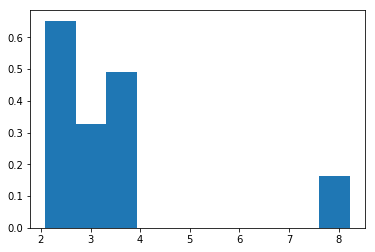

In [36]:
count, bins, _ = plt.hist(x[0], normed=True)
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.show()

In [9]:
meansamples(10000,1000) 

(0.0003938729168391422,
 0.03163908067972737,
 -0.0616187252154265,
 0.06240647104910479,
 0.9521)